In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 29 17:40:21 2017

@author: amyse
"""

import os
os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32'
os.environ['CPLUS_INCLUDE_PATH'] = 'C:/Users/amyse/CUDA/v8.0/include'
#
#
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D,ZeroPadding3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
import random
import theano
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import KFold

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce 940M (0000:04:00.0)


In [5]:
# image specification
img_rows,img_cols,img_depth=20,20,15
kernel_size = 3
# Training data

X_tr=[]           # variable to store entire dataset
label=[]

count=0
folders = os.listdir('kth dataset/')
#folders=['32','59']
for dir_ in folders:
    appen=  'kth dataset' + '/' + dir_+'/'
    listing = os.listdir(appen)
    for vid in listing:
        vid = appen+vid
        frames = []
        cap = cv2.VideoCapture(vid)
        fps = cap.get(5)
        print("Frames per second using video.get(cv2CAP_PROP_FPS): {0}".format(fps))


        for k in np.arange(15):
            ret, frame = cap.read()
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

        input=np.array(frames)

        print (input.shape)
        ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
        print (ipt.shape)

        X_tr.append(ipt)
        label.append(count)
    count += 1
    
label= np.array(label)
X_tr_array=np.array(X_tr)

Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Fram

Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Fram

(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15,

(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15,

Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Fram

Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Frames per second using video.get(cv2CAP_PROP_FPS): 25.0
(15, 20, 20)
(20, 20, 15)
Fram

In [6]:
label= np.array(label)
X_t=np.array(X_tr)

# Split the data
X_tr_array, y_tr, y_t,y_te =  train_test_split(X_t, label, test_size=0.2, random_state=4)

num_samples = X_tr_array.shape[0]
print(num_samples)

#Assign Label to each class



train_data = [X_tr_array,y_t]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_tr_array.shape)

train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))

for h in np.arange(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]
    
test_data = [y_tr,y_te]

(t_train, t_label) = (test_data[0],test_data[1])


test_set = np.zeros((y_tr.shape[0], 1, img_rows,img_cols,img_depth))

for h in np.arange(y_tr.shape[0]):
    test_set[h][0][:][:][:]=t_train[h,:,:,:]

479
X_Train shape: (479, 20, 20, 15)


In [12]:
patch_size = 5   # img_depth or number of frames used for each video

print(train_set.shape, 'train samples')

# CNN Training parameters

batch_size = 10
nb_classes = label.max()+1
nb_epoch =100

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
# number of folds
nth=3

# number of convolutional filters to use at each layer
nb_filters = [32, 32]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [3, 3]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [5,5]

# Pre-processing

train_set = train_set.astype('float32')

train_set -= np.mean(train_set)

train_set /=np.max(train_set)



(479, 1, 20, 20, 15) train samples


In [ ]:
# Define model
kernel_size = 3
model = Sequential()

model.add(Convolution3D(nb_filters[0], kernel_dim1=nb_conv[0], kernel_dim2=nb_conv[0], kernel_dim3=nb_conv[0],
input_shape=(1, img_rows, img_cols, img_depth), activation='relu'))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))

    # 2nd layer group
model.add(Convolution3D(128, 3, 3, 3, activation='relu',
                            border_mode='same', name='conv2',
                            subsample=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                           border_mode='valid', name='pool2'))

    # 3rd layer group
model.add(Convolution3D(256, 3, 3, 3, activation='relu',
                            border_mode='same', name='conv3a',
                            subsample=(1, 1, 1)))
model.add(Convolution3D(256, 3, 3, 3, activation='relu',
                            border_mode='same', name='conv3b',
                            subsample=(1, 1, 1)))



model.add(Flatten())

    # FC layers group
model.add(Dense(4096, activation='relu', name='fc6'))
model.add(Dropout(.5))
model.add(Dense(4096, activation='relu', name='fc7'))
model.add(Dropout(.5))
model.add(Dense(nb_classes, kernel_initializer="normal"))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])

model.summary()  


C:\Users\amyse\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, (5, 5, 5), input_shape=(1, 20, 20..., activation="relu")`
  
C:\Users\amyse\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(128, (3, 3, 3), name="conv2", strides=(1, 1, 1), activation="relu", padding="same")`
  del sys.path[0]
C:\Users\amyse\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(name="pool2", strides=(2, 2, 2), pool_size=(2, 2, 2), padding="valid")`
  from ipykernel import kernelapp as app
C:\Users\amyse\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(256, (3, 3, 3), name="conv3a", strides=(1, 1, 1), activation="relu", padding="same")`
C:\Users\amyse\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarni

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 32, 16, 16, 11)    4032      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 32, 5, 5, 3)       0         
_________________________________________________________________
conv2 (Conv3D)               (None, 128, 5, 5, 3)      110720    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 128, 2, 2, 1)      0         
_________________________________________________________________
conv3a (Conv3D)              (None, 256, 2, 2, 1)      884992    
_________________________________________________________________
conv3b (Conv3D)              (None, 256, 2, 2, 1)      1769728   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

KFold(n_splits=3, random_state=9, shuffle=True)
Train on 319 samples, validate on 160 samples
Epoch 1/100
319/319 [==============================] - 4s - loss: 1.9571 - acc: 0.2132 - val_loss: 1.3566 - val_acc: 0.3438
Epoch 2/100
319/319 [==============================] - 4s - loss: 1.2918 - acc: 0.3103 - val_loss: 1.4180 - val_acc: 0.3438
Epoch 3/100
319/319 [==============================] - 5s - loss: 1.2564 - acc: 0.3292 - val_loss: 1.1686 - val_acc: 0.3688
Epoch 4/100
319/319 [==============================] - 5s - loss: 1.1929 - acc: 0.2978 - val_loss: 1.1749 - val_acc: 0.2875
Epoch 5/100
319/319 [==============================] - 4s - loss: 1.2008 - acc: 0.3260 - val_loss: 1.3232 - val_acc: 0.3313
Epoch 6/100
319/319 [==============================] - 4s - loss: 1.1283 - acc: 0.4263 - val_loss: 1.0069 - val_acc: 0.4875
Epoch 7/100
319/319 [==============================] - 4s - loss: 1.1221 - acc: 0.4295 - val_loss: 1.0377 - val_acc: 0.4625
Epoch 8/100
319/319 [=================

319/319 [==============================] - 5s - loss: 0.4153 - acc: 0.8715 - val_loss: 2.4482 - val_acc: 0.6375
Epoch 66/100
319/319 [==============================] - 5s - loss: 0.4957 - acc: 0.8840 - val_loss: 2.9610 - val_acc: 0.6063
Epoch 67/100
319/319 [==============================] - 5s - loss: 0.6057 - acc: 0.8495 - val_loss: 2.8839 - val_acc: 0.6000
Epoch 68/100
319/319 [==============================] - 5s - loss: 0.6265 - acc: 0.8809 - val_loss: 3.3581 - val_acc: 0.6313
Epoch 69/100
319/319 [==============================] - 5s - loss: 0.5746 - acc: 0.8715 - val_loss: 3.5014 - val_acc: 0.5813
Epoch 70/100
319/319 [==============================] - 5s - loss: 0.8423 - acc: 0.8746 - val_loss: 3.0514 - val_acc: 0.5563
Epoch 71/100
319/319 [==============================] - 5s - loss: 0.5581 - acc: 0.8370 - val_loss: 2.4522 - val_acc: 0.6000
Epoch 72/100
319/319 [==============================] - 5s - loss: 0.2673 - acc: 0.9122 - val_loss: 4.2477 - val_acc: 0.6438
Epoch 73/100


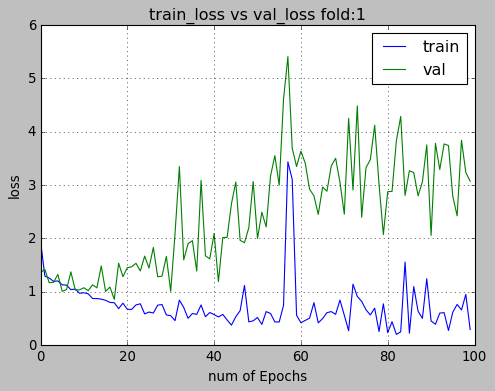

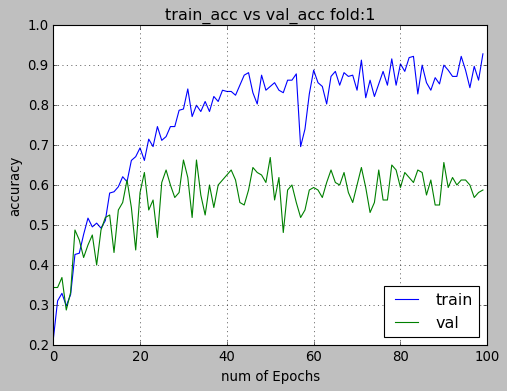

Train on 319 samples, validate on 160 samples
Epoch 1/100
319/319 [==============================] - 5s - loss: 1.3388 - acc: 0.7085 - val_loss: 0.4377 - val_acc: 0.8562
Epoch 2/100
319/319 [==============================] - 5s - loss: 0.9478 - acc: 0.7304 - val_loss: 0.9264 - val_acc: 0.8250
Epoch 3/100
319/319 [==============================] - 5s - loss: 0.9592 - acc: 0.7085 - val_loss: 0.5350 - val_acc: 0.7937
Epoch 4/100
319/319 [==============================] - 5s - loss: 0.7653 - acc: 0.7492 - val_loss: 1.2514 - val_acc: 0.7500
Epoch 5/100
319/319 [==============================] - 5s - loss: 1.1156 - acc: 0.7806 - val_loss: 0.7319 - val_acc: 0.7125
Epoch 6/100
319/319 [==============================] - 5s - loss: 0.6512 - acc: 0.7492 - val_loss: 0.4241 - val_acc: 0.8375
Epoch 7/100
319/319 [==============================] - 5s - loss: 0.8584 - acc: 0.7712 - val_loss: 0.6775 - val_acc: 0.7312
Epoch 8/100
319/319 [==============================] - 5s - loss: 0.5972 - acc: 0.8056

In [ ]:

# Split the data into n-folds
X = train_set.copy()
y = Y_train.copy()
kf = KFold(n_splits=nth,random_state =9,shuffle=True)
kf.get_n_splits(X)
mean_=[]
print(kf)  
count=1
T_label=np_utils.to_categorical(t_label, nb_classes)
for train_index, test_index in kf.split(X):
   
    xx_train, xx_test = X[train_index], X[test_index]
    yy_train, yy_test = y[train_index], y[test_index]
    
    hist = model.fit(xx_train, yy_train, validation_data=(xx_test,yy_test),
          batch_size=batch_size,epochs = nb_epoch,validation_split=0.3, verbose=1)
    score = model.evaluate( xx_test,yy_test, batch_size=batch_size)
    print('Test score:', score)
    mean_.append(score)
    ## Plot the results
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    train_acc=hist.history['acc']
    val_acc=hist.history['val_acc']
    xc=range(nb_epoch)
    #
    plt.figure(1,figsize=(7,5))
    plt.plot(xc,train_loss)
    plt.plot(xc,val_loss)
    plt.xlabel('num of Epochs')
    plt.ylabel('loss')
    tt2='train_loss vs val_loss fold:'+ str(count)
    plt.title(tt2)
    plt.grid(True)
    plt.legend(['train','val'])
    print(plt.style.available) # use bmh, classic,ggplot for big pictures
    plt.style.use(['classic'])
    #
    plt.figure(2,figsize=(7,5))
    plt.plot(xc,train_acc)
    plt.plot(xc,val_acc)
    plt.xlabel('num of Epochs')
    plt.ylabel('accuracy')
    tit='train_acc vs val_acc fold:'+ str(count)
    plt.title(tit)
    plt.grid(True)
    plt.legend(['train','val'],loc=4)
    #print plt.style.available # use bmh, classic,ggplot for big pictures
    plt.style.use(['classic'])
    plt.show()
    count+=1

In [10]:
#results
# loss  accuracy
print(np.array(mean_))

[[  9.1335874    0.43333333]
 [ 14.10333379   0.125     ]
 [ 12.71028209   0.20833334]]
